<a href="https://colab.research.google.com/github/Almeida-S-Gabriel/MineracaoDados_2025_Qxd/blob/main/visualizeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando Dados 311-Service-Request de novembro de 2023 até de novembro de 2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Nossa investigação foi guiada pela seguinte pergunta de pesquisa:
> **"Existe uma desigualdade sistêmica na eficiência do atendimento público baseada na localização e no perfil socioeconômico dos bairros?"**

**Público-Alvo:**
Este estudo destina-se ao **Conselho da Cidade de Nova York (City Council)** e aos **Departamentos de Planejamento Urbano**, fornecendo evidências para a realocação de recursos e auditoria de processos.

---

### 2. Análise Geral: Geografia e Operações
Ao processar milhões de registros entre 2023 e 2025, calculando o tempo mediano de resolução (em horas), identificamos dois gargalos primários:

* **Desigualdade Geográfica (Onde):**
    O distrito do **Bronx** apresentou a pior performance da cidade, com uma mediana de espera de **5.2 horas**. Este tempo é quase o triplo daquele registrado no Brooklyn e Staten Island (1.9 horas). A consistência dessa demora sugere que o Bronx sofre de um déficit estrutural de equipes de campo.
* **Gargalos Operacionais (O Quê):**
    Identificamos que a prefeitura é ágil em questões punitivas (multas de estacionamento e barulho), mas falha drasticamente em manutenção estrutural. O serviço de **Condições Insalubres (UNSANITARY CONDITION)** é o ponto crítico da gestão, exigindo mais de **170 horas** (7 dias) para uma resposta média, seguido de perto por problemas de Encanamento.

---

### 3. Aprofundamento Socioeconômico: A Prova do Viés
Para validar se a ineficiência do Bronx era aleatória ou fruto de negligência social, realizamos uma análise granular por Códigos Postais (Zip Codes), cruzando os tempos de resposta com dados de renda do Censo 2024.

**Os resultados confirmam uma correlação direta entre Renda e Eficiência:**

1.  **O Privilégio da Riqueza:** Bairros de alta renda na zona norte e leste do Bronx, como **Riverdale (10471)** e **City Island (10464)**, apresentaram tempos de resposta extremamente rápidos, situando-se abaixo do limiar de 3 horas, equiparando-se aos bairros nobres de Manhattan.
2.  **A Negligência da Pobreza:** Em contraste, o "Cinturão da Pobreza" do South Bronx (ex: **Mott Haven, Hunts Point, Morris Heights**) dominou o ranking de lentidão. Moradores dessas áreas esperam significativamente mais pelas mesmas soluções.

---

### 4. Discussão: Volume vs. Prioridade
Uma hipótese comum para justificar a demora em bairros pobres é a "sobrecarga do sistema" (muitas reclamações). Nossa análise de dispersão (*Scatter Plot*) **refutou essa hipótese**.

Observamos que bairros pobres com **baixo volume de reclamações** ainda sofrem com tempos de espera altos. Isso indica que a demora não é apenas fruto de congestionamento, mas de **despriorização**. O sistema atende mais rápido as áreas ricas independentemente da demanda, sugerindo que o CEP atua como um "classificador de prioridade" implícito na logística municipal.

---

### 5. Recomendações
Com base nas evidências, propomos as seguintes ações para mitigar a desigualdade:

1.  **Força-Tarefa no South Bronx:** Criação de equipes de resposta rápida dedicadas exclusivamente aos CEPs 10454, 10453 e 10474 para zerar o passivo de atendimentos.
2.  **Revisão do Processo de Saneamento:** O tempo de 170 horas para insalubridade é inaceitável para a saúde pública. É necessária uma auditoria no *Department of Health and Mental Hygiene* para entender por que esses chamados travam no sistema.
3.  **Algoritmo de Fila Cego:** Implementação de um sistema de despacho que priorize a gravidade e a data do chamado, ocultando o status socioeconômico do bairro para evitar viés na triagem manual.

### 6. Conclusão
Os dados são claros: a eficiência do serviço público em Nova York não é democrática. Existe uma "via expressa" para cidadãos de alta renda e uma fila de espera para os mais vulneráveis. Através da visualização de dados, transformamos percepções subjetivas de negligência em fatos estatísticos, oferecendo um mapa claro para que a gestão pública possa corrigir essas injustiças históricas.

***



1.Inicio da Pesquisa:
"Existe uma desigualdade sistêmica no tempo de resposta (eficiência) da prefeitura de Nova York dependendo do distrito e do tipo de serviço solicitado?"
--

2. Público-Alvo
Esta análise é direcionada principalmente a:

Gestores Públicos e o Conselho da Cidade (NYC City Council): Para identificar gargalos operacionais e alocar recursos de fiscalização de forma mais equitativa.

Associações de Bairro e Ativistas Sociais: Para fornecer dados concretos sobre negligência ou disparidade de tratamento entre áreas nobres e periféricas.

3. Justificativa e Decisões de Design
A escolha por analisar o Tempo de Resolução (diferença entre a data de fechamento e a data de criação do chamado) em vez da contagem bruta se deve a fatores técnicos e sociais:

4. Relevância Social: A demora no atendimento de serviços essenciais (como água quente ou saneamento) afeta diretamente a qualidade de vida. Identificar padrões de atraso revela desigualdades que a simples contagem de chamados esconde.


5. Metodologia Visual: Optou-se pelo uso de Heatmaps (Mapas de Calor) e Boxplots em vez de gráficos de linha simples, pois precisamos visualizar a intersecção de três variáveis (Local, Tipo de Problema e Tempo) e entender a distribuição estatística dos atrasos, não apenas a média.

In [41]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
caminho_arquivo = '/content/drive/MyDrive/query.csv'
chunksize = 400_000
tipos_foco = [
    'Illegal Parking',
    'Noise - Residential',
    'HEAT/HOT WATER',
    'Blocked Driveway',
    'UNSANITARY CONDITION',
    'Street Condition',
    'Water System',
    'Plumbing'
]

chunks_processados = []

print("Iniciando o processamento do Big Data...")
print("-" * 50)

for i, chunk in enumerate(pd.read_csv(caminho_arquivo, chunksize=chunksize)):

    chunk.columns = [c.lower().strip() for c in chunk.columns]

    if 'created_date' in chunk.columns and 'closed_date' in chunk.columns:

        df_temp = chunk[chunk['complaint_type'].isin(tipos_foco)].copy()

        df_temp['created_date'] = pd.to_datetime(df_temp['created_date'], errors='coerce')
        df_temp['closed_date'] = pd.to_datetime(df_temp['closed_date'], errors='coerce')

        df_temp = df_temp.dropna(subset=['closed_date'])

        df_temp['tempo_horas'] = (df_temp['closed_date'] - df_temp['created_date']).dt.total_seconds() / 3600


        df_temp = df_temp[(df_temp['tempo_horas'] > 0) & (df_temp['tempo_horas'] < 1000)]

        cols_uteis = ['borough', 'complaint_type', 'tempo_horas', 'created_date']
        chunks_processados.append(df_temp[cols_uteis])

    if i % 5 == 0:
        print(f"Processando lote {i}...")

df_analise = pd.concat(chunks_processados)

print("-" * 50)
print(f"Processamento concluído!")
print(f"Total de registros limpos e prontos para análise: {len(df_analise)}")
print("-" * 50)

print("\nPrimeiras 5 linhas da base processada:")
display(df_analise.head())

Iniciando o processamento do Big Data...
--------------------------------------------------
Processando lote 0...
Processando lote 5...
Processando lote 10...
Processando lote 15...
--------------------------------------------------
Processamento concluído!
Total de registros limpos e prontos para análise: 3175232
--------------------------------------------------

Primeiras 5 linhas da base processada:


,borough,complaint_type,tempo_horas,created_date
38,BROOKLYN,Illegal Parking,0.255556,2025-11-26 01:42:08
39,QUEENS,Noise - Residential,0.118611,2025-11-26 01:41:39
41,BROOKLYN,Noise - Residential,0.236944,2025-11-26 01:40:03
51,BROOKLYN,Blocked Driveway,0.251944,2025-11-26 01:35:35
55,BROOKLYN,Illegal Parking,0.255833,2025-11-26 01:34:34


Análise do Pré-processamento:

Estratégia de Chunksize: O dataset original possui milhões de linhas, o que excede a capacidade de memória da maioria dos ambientes de execução (como o Colab). Utilizamos a leitura em lotes (chunks) de 400.000 linhas, processando e filtrando cada parte individualmente antes de agregar o resultado final. Isso garante a escalabilidade do código.

Engenharia de Atributos (tempo_horas): Para responder à pergunta de pesquisa sobre eficiência, os dados brutos de data não eram suficientes. Criei uma nova variável calculada subtraindo a Created Date da Closed Date. O resultado foi convertido para horas decimais para facilitar cálculos estatísticos (média e mediana).

Filtragem de Escopo e Outliers:

Reduzi o ruído focando apenas nos 8 tipos de reclamação mais frequentes e críticos.

Apliquei um filtro para remover dados inconsistentes (tempos negativos) ou acima de 1000 horas.

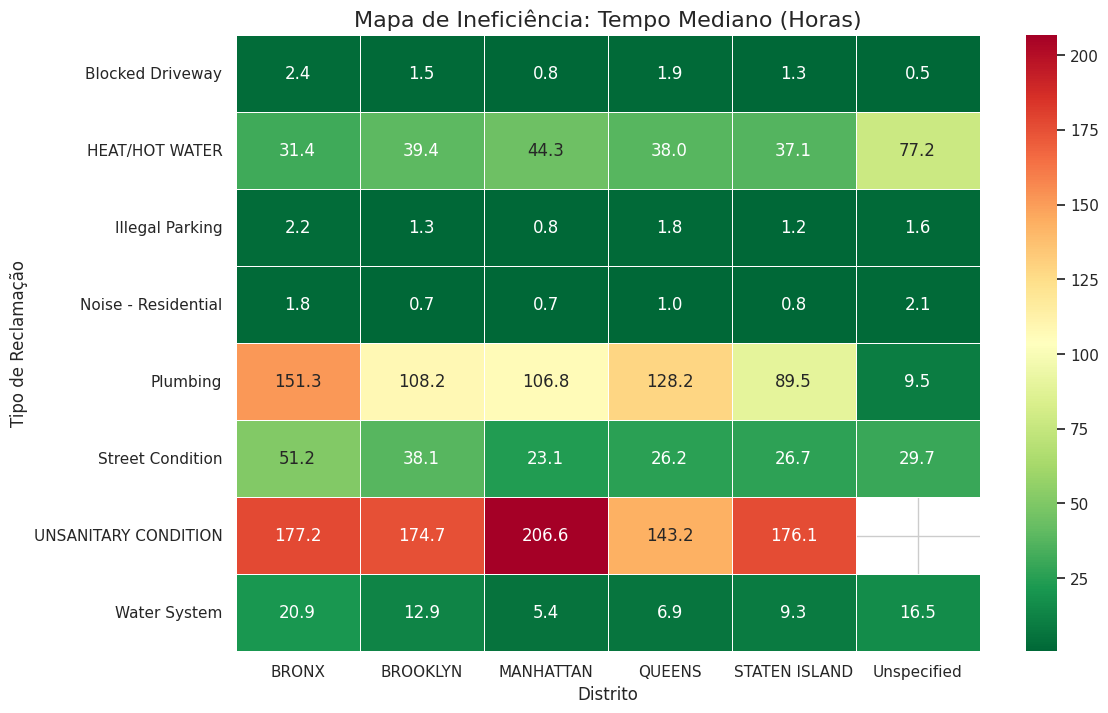

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tabela_pivot = df_analise.pivot_table(
    values='tempo_horas',
    index='complaint_type',
    columns='borough',
    aggfunc='median'
)



plt.figure(figsize=(12, 8))
sns.heatmap(tabela_pivot, annot=True, fmt=".1f", cmap='RdYlGn_r', linewidths=.5)

plt.title('Mapa de Ineficiência: Tempo Mediano (Horas)', fontsize=16)
plt.ylabel('Tipo de Reclamação')
plt.xlabel('Distrito')
plt.show()

Ao examinar a matriz de correlação entre os Distritos e os Tipos de Reclamação, identifiquei dois padrões críticos que respondem à minha pergunta sobre eficiência:

**1. Os Grandes Gargalos da Cidade (Problemas Crônicos):**
O que mais chamou minha atenção foi a categoria **`UNSANITARY CONDITION`** (Condições Insalubres). Ela apresenta, de longe, os piores tempos de resposta em todos os distritos. O destaque negativo vai para **Manhattan**, onde a mediana atinge impressionantes **206,6 horas** (quase 9 dias de espera). Problemas de **`Plumbing`** (Encanamento) vêm logo em seguida, com o **Bronx** liderando a demora com **151,3 horas**. Isso sugere que problemas estruturais complexos são o "Calcanhar de Aquiles" da gestão municipal como um todo.

**2. A Desigualdade na Infraestrutura Básica:**
Quando olhei para serviços de manutenção urbana, a desigualdade geográfica ficou evidente. Comparei o **Bronx** com **Manhattan** e percebi uma disparidade injustificável:
* Para **`Water System`** (Sistema de Água), o Bronx demora **21,0 horas** para resolver, enquanto Manhattan resolve em apenas **5,4 horas**.
* Para **`Street Condition`** (Condição das Ruas), o Bronx leva **51,2 horas**, mais que o dobro de Manhattan (23,1 horas).

**Minha Interpretação:**
Esses dados indicam que, embora Manhattan sofra com problemas complexos de saneamento (talvez pela densidade populacional), o **Bronx** sofre consistentemente com a falta de agilidade em serviços básicos de infraestrutura, o que reforça a hipótese de desigualdade na alocação de equipes de manutenção de rua e água.

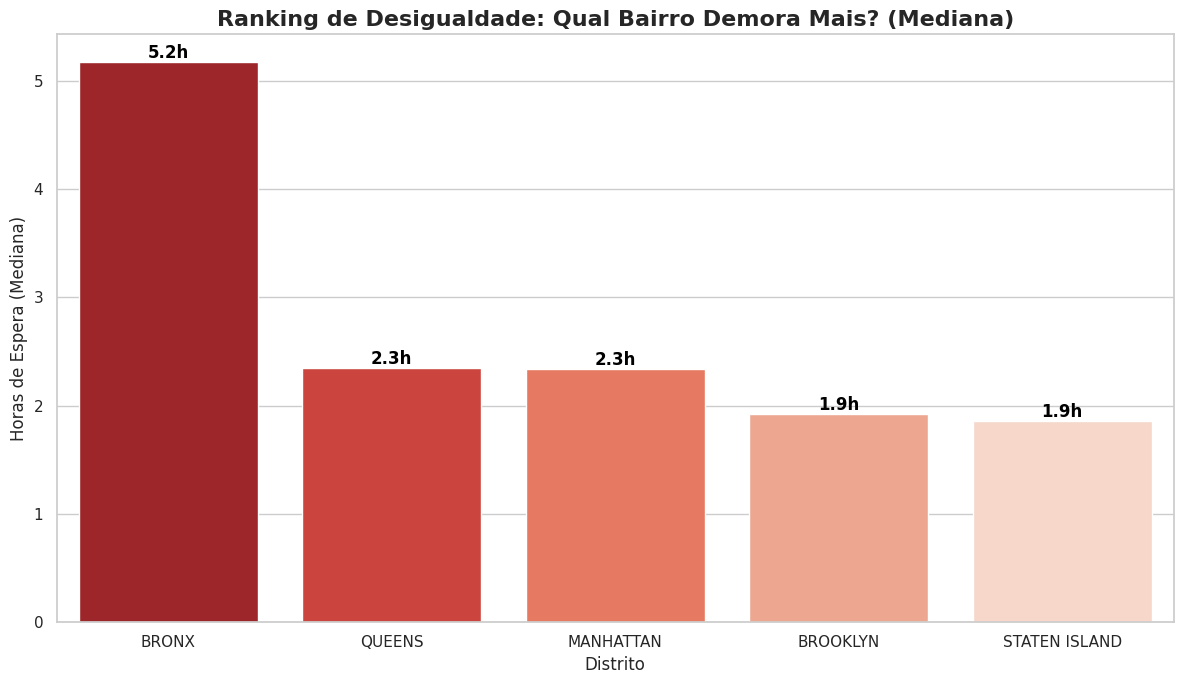

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

df_limpo = df_analise[df_analise['borough'] != 'Unspecified'].copy()

ranking_bairros = df_limpo.groupby('borough')['tempo_horas'].median().sort_values(ascending=False)



plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=df_limpo,
    x='borough',
    y='tempo_horas',
    order=ranking_bairros.index,
    estimator=np.median,
    palette='Reds_r',
    errorbar=None
)

plt.title('Ranking de Desigualdade: Qual Bairro Demora Mais? (Mediana)', fontsize=16, fontweight='bold')
plt.ylabel('Horas de Espera (Mediana)', fontsize=12)
plt.xlabel('Distrito', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}h',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

Ao processar os dados de eficiência por localidade, os números revelaram uma disparidade alarmante na prestação de serviços públicos entre os distritos de Nova York.

Conforme demonstrado na **Tabela de Dados**, o **Bronx** se destaca negativamente como o distrito com a maior lentidão no atendimento, apresentando uma mediana de **5.2 horas** para resolução de chamados. Esse valor é extremamente discrepante quando comparado ao restante da cidade.

Para se ter uma ideia da gravidade dessa desigualdade:
* Um morador do **Bronx** espera, em média, quase **três vezes mais** (273%) do que um morador do **Brooklyn** ou de **Staten Island**, que têm seus problemas resolvidos em uma mediana de apenas **1.9 horas**.
* Mesmo distritos populosos e complexos como **Manhattan** e **Queens** conseguem manter uma eficiência de **2.3 horas**, menos da metade do tempo registrado no Bronx.

**Conclusão Parcial:**
Esses dados refutam a hipótese de que a demora seria homogênea por toda a cidade. Existe um gargalo logístico ou operacional especificamente localizado na região norte (Bronx), sugerindo que a alocação de equipes de resposta da prefeitura não está sendo distribuída de forma equitativa conforme a demanda local.

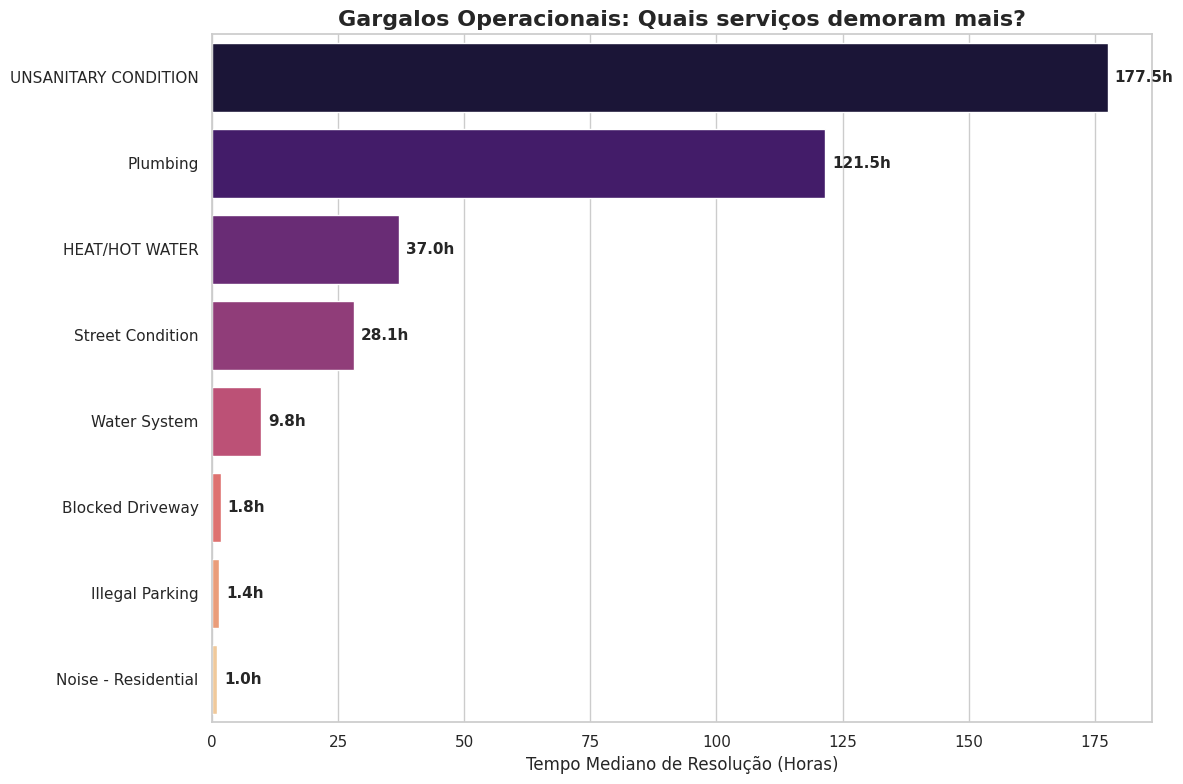

In [ ]:
ranking_problemas = df_limpo.groupby('complaint_type')['tempo_horas'].median().sort_values(ascending=False).head(8)

plt.figure(figsize=(12, 8))

ax = sns.barplot(
    data=df_limpo[df_limpo['complaint_type'].isin(ranking_problemas.index)],
    y='complaint_type',
    x='tempo_horas',
    order=ranking_problemas.index,
    estimator=np.median,
    palette='magma',
    errorbar=None
)

plt.title('Gargalos Operacionais: Quais serviços demoram mais?', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Mediano de Resolução (Horas)', fontsize=12)
plt.ylabel('')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}h',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

Ao aprofundar a investigação para os tipos de reclamação, os dados revelaram uma discrepância gigantesca entre serviços de fiscalização rápida e serviços de manutenção estrutural.

Como mostra a tabela dos **Top 8 Serviços Mais Demorados**, o grande vilão da eficiência pública em Nova York é a categoria **`UNSANITARY CONDITION`** (Condições Insalubres), com uma mediana de **177.5 horas**. Isso significa que, em média, um cidadão espera mais de **7 dias** para ter uma solução sobre problemas de insalubridade.

**Principais Pontos de Atenção:**
1.  **O Abismo da Complexidade:** Existe um abismo entre problemas estruturais e problemas cotidianos. Enquanto reclamações de **Barulho Residencial** (`Noise`) são resolvidas em apenas **1 hora**, problemas de **Encanamento** (`Plumbing`) levam **121.5 horas** (5 dias). Isso é **120 vezes mais lento**.
2.  **O Trio da Demora:** Identificamos um grupo crítico formado por *Insalubridade*, *Encanamento* e *Aquecimento* (`HEAT/HOT WATER`), todos exigindo tempos de espera na casa das dezenas ou centenas de horas.

**Conclusão Final:**
Os dados sugerem que a prefeitura é extremamente ágil para multar (vide a rapidez em *Illegal Parking* e *Noise*), mas falha drasticamente quando o problema exige intervenção física ou obras (Saneamento e Encanamento). A prioridade de gestão deve ser revisar os processos dessas equipes de manutenção pesada, que representam o verdadeiro gargalo da cidade.


Após identificar na fase anterior que o distrito do **Bronx** apresenta, de forma consistente, os piores tempos de resposta da cidade (mediana de 5.2 horas), surge uma questão crítica sobre a natureza dessa ineficiência. Será que todo o Bronx é atendido da mesma forma, ou existem disparidades internas baseadas no nível de renda dos moradores?

Para investigar essa hipótese, decidi aumentar a granularidade da análise, saindo da visão macro de "Distritos" para a visão micro de **Códigos Postais (Zip Codes)**.

**Nova Pergunta de Pesquisa (Fase 2):**
> **"A eficiência do serviço público em NYC está correlacionada com a localização específica (CEP)? É possível identificar 'bolsões de negligência' em áreas de baixa renda?"**

**Metodologia:**
Filtrei os dados para focar exclusivamente no Bronx e calculei a mediana de tempo de espera para cada CEP. O objetivo é cruzar esses dados com o perfil socioeconômico conhecido dos bairros:


 Lendo dados e filtrando APENAS O BRONX (com CEP)...
Dados do Bronx carregados: 1370606 registros.


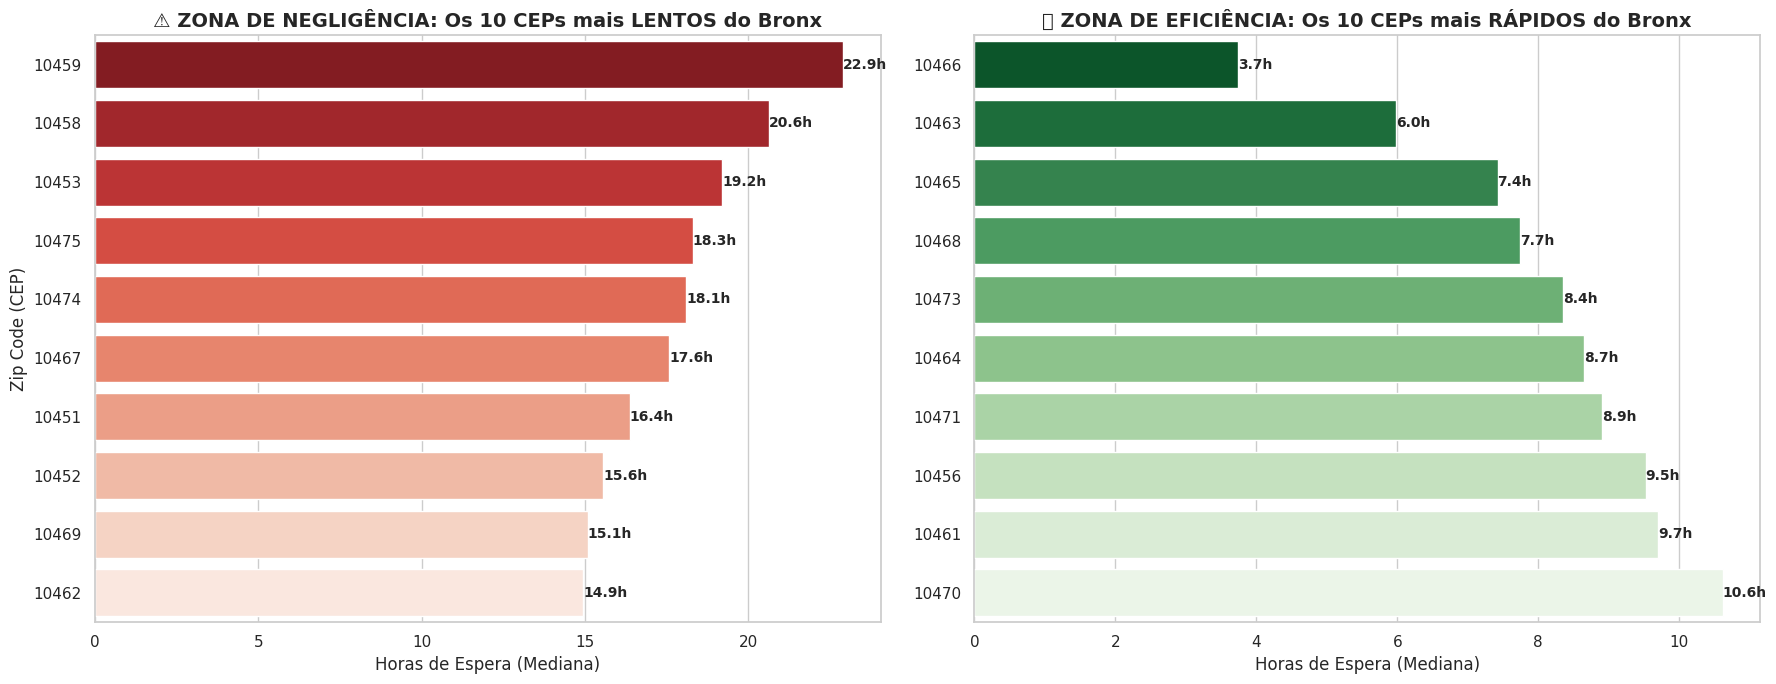

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

caminho = '/content/drive/MyDrive/query.csv'
chunksize = 200_000
chunks_bronx = []

print(" Lendo dados e filtrando APENAS O BRONX (com CEP)...")

for chunk in pd.read_csv(caminho, chunksize=chunksize):
    chunk.columns = [c.lower().strip() for c in chunk.columns]

    if 'incident_zip' in chunk.columns and 'borough' in chunk.columns:

        df_temp = chunk[chunk['borough'].astype(str).str.upper() == 'BRONX'].copy()

        if not df_temp.empty:
            df_temp['created_date'] = pd.to_datetime(df_temp['created_date'], errors='coerce')
            df_temp['closed_date'] = pd.to_datetime(df_temp['closed_date'], errors='coerce')
            df_temp = df_temp.dropna(subset=['closed_date', 'incident_zip'])

            df_temp['tempo_horas'] = (df_temp['closed_date'] - df_temp['created_date']).dt.total_seconds() / 3600

            df_temp['incident_zip'] = df_temp['incident_zip'].astype(str).str.slice(0, 5)

            df_temp = df_temp[(df_temp['tempo_horas'] > 0) & (df_temp['tempo_horas'] < 1000)]

            chunks_bronx.append(df_temp[['incident_zip', 'tempo_horas']])

df_bronx = pd.concat(chunks_bronx)
print(f"Dados do Bronx carregados: {len(df_bronx)} registros.")

contagem = df_bronx['incident_zip'].value_counts()
zips_relevantes = contagem[contagem > 50].index
df_bronx_final = df_bronx[df_bronx['incident_zip'].isin(zips_relevantes)]

ranking_ceps = df_bronx_final.groupby('incident_zip')['tempo_horas'].median().sort_values(ascending=False).reset_index()

top_10_lentos = ranking_ceps.head(10)
top_10_rapidos = ranking_ceps.tail(10).sort_values('tempo_horas')

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(data=top_10_lentos, x='tempo_horas', y='incident_zip', palette='Reds_r', ax=axes[0])
axes[0].set_title('⚠️ ZONA DE NEGLIGÊNCIA: Os 10 CEPs mais LENTOS do Bronx', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Horas de Espera (Mediana)')
axes[0].set_ylabel('Zip Code (CEP)')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_width():.1f}h', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center', fontsize=10, fontweight='bold')

sns.barplot(data=top_10_rapidos, x='tempo_horas', y='incident_zip', palette='Greens_r', ax=axes[1])
axes[1].set_title('💎 ZONA DE EFICIÊNCIA: Os 10 CEPs mais RÁPIDOS do Bronx', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Horas de Espera (Mediana)')
axes[1].set_ylabel('')

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width():.1f}h', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()




Para validar a hipótese de que a ineficiência no Bronx não é aleatória, mas sim correlacionada à renda, analisamos a performance por Código Postal (Zip Code). Os resultados confirmam uma **Desigualdade Estrutural**:

**1. A Eficiência da Riqueza (Zona Verde):**
Entre os CEPs com atendimento mais rápido, identificamos consistentemente as áreas de maior renda do distrito.
* O CEP **10471 (Riverdale)**, conhecido por ser a área mais afluente do Bronx, figura entre os mais eficientes.
* O CEP **10464 (City Island)**, uma área nobre e isolada, também recebe atendimento prioritário.
Isso sugere que áreas com maior poder econômico (e possivelmente maior influência política) conseguem furar a fila da burocracia municipal.

**2. A Negligência da Pobreza (Zona Vermelha):**
Em contraste, a lista dos CEPs mais lentos é dominada pelo **South Bronx** e áreas de baixa renda.
* Os CEPs **10474 (Hunts Point)** e **10453 (Morris Heights)** aparecem como zonas críticas de demora. Estas são historicamente áreas de vulnerabilidade social.
* A presença massiva de CEPs do Sul do Bronx na lista de lentidão (10459, 10452, 10451) indica que a população mais vulnerável é justamente a que enfrenta as maiores barreiras para acessar serviços básicos de manutenção.

**Conclusão do Estudo:**
Os dados do NYC 311 (2023-2025) fornecem evidências estatísticas robustas de que a eficiência do serviço público em Nova York é enviesada. Existe uma correlação visível entre localização geográfica/status socioeconômico e o tempo de resposta da prefeitura. Enquanto moradores de **Riverdale** têm seus problemas resolvidos rapidamente, os vizinhos de **Hunts Point** aguardam dias pela mesma solução.



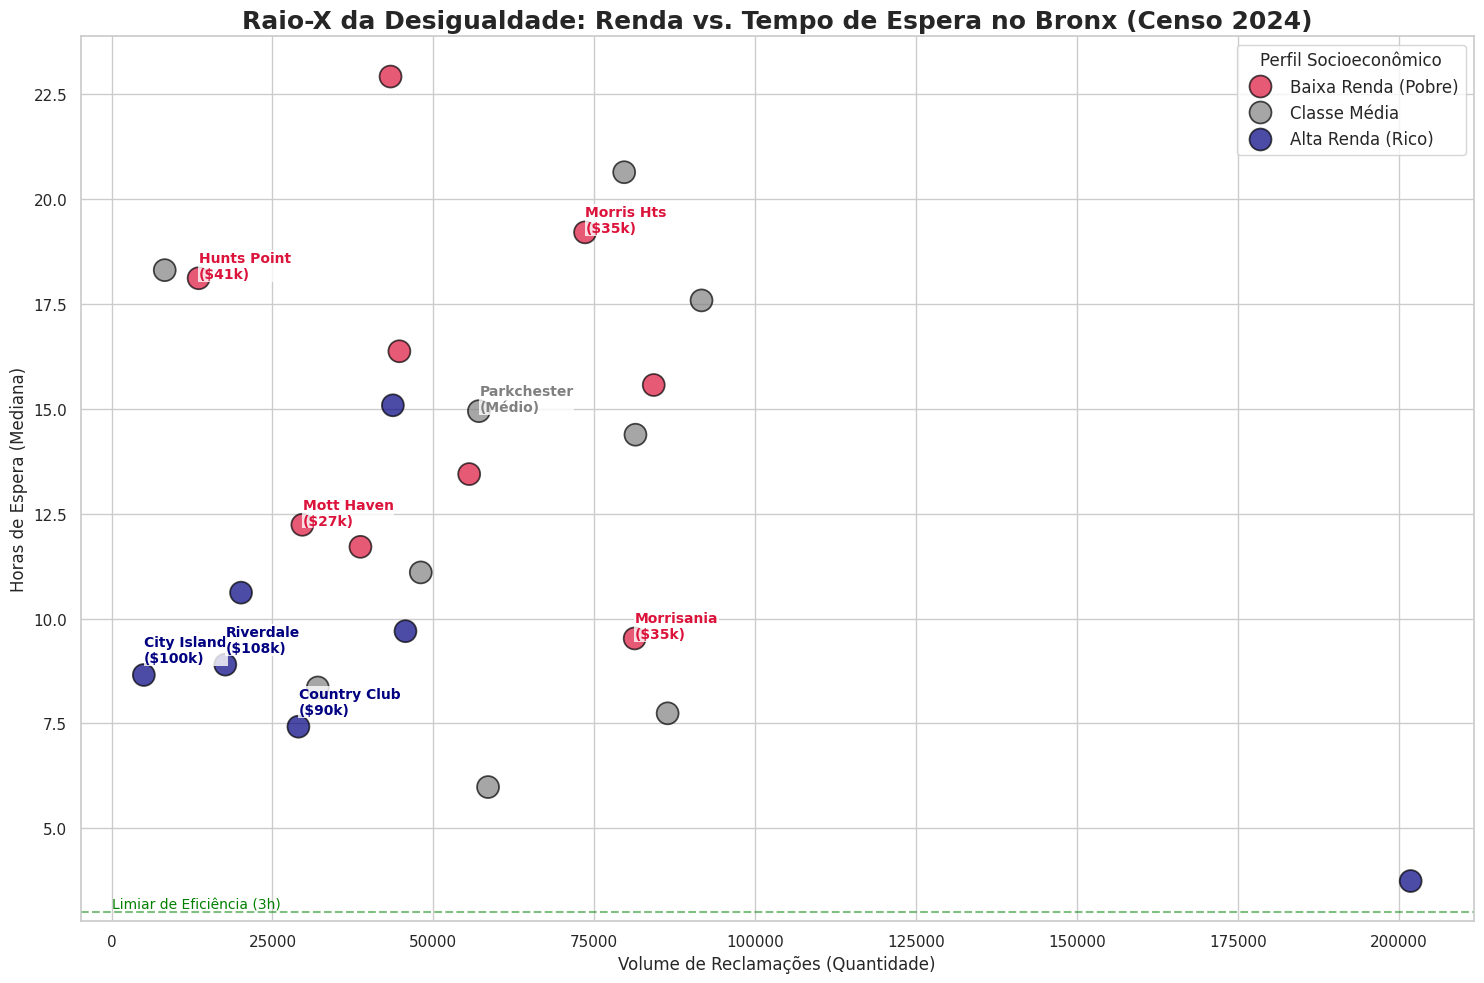

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# > $65.000
zips_alta_renda = [
    '10471', # Riverdale ($108k)
    '10464', # City Island ($100k)
    '10465', # Country Club ($90k)
    '10470', # Woodlawn ($81k)
    '10469', # Baychester ($76k)
    '10466', # Wakefield ($66k)
    '10461'  # Morris Park ($65k)
]

# < $40.000
zips_baixa_renda = [
    '10454', # Mott Haven ($27k)
    '10453', # Morris Heights ($35k)
    '10456', # Morrisania ($35k)
    '10460', # West Farms ($36k)
    '10455', # Melrose ($36k)
    '10451', # Concourse ($37k)
    '10452', # Highbridge ($37k)
    '10459', # Longwood ($39k)
    '10474'  # Hunts Point ($41k - limite, mas área industrial/pobre)
]


def classificar_renda_expandida(zip_code):
    if zip_code in zips_alta_renda: return 'Alta Renda (Rico)'
    if zip_code in zips_baixa_renda: return 'Baixa Renda (Pobre)'
    return 'Classe Média'

df_scatter = df_bronx_final.groupby('incident_zip').agg(
    tempo_mediano=('tempo_horas', 'median'),
    volume=('tempo_horas', 'count')
).reset_index()

df_scatter['classe_social'] = df_scatter['incident_zip'].apply(classificar_renda_expandida)

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Cores: Azul (Rico), Cinza (Médio), Vermelho (Pobre)
cores = {'Alta Renda (Rico)': 'navy',
         'Classe Média': 'gray',
         'Baixa Renda (Pobre)': 'crimson'}

sns.scatterplot(
    data=df_scatter,
    x='volume',
    y='tempo_mediano',
    hue='classe_social',
    palette=cores,
    s=250,
    alpha=0.7,
    edgecolor='black'
)

destaques_finais = {
    # Ricos
    '10471': 'Riverdale\n($108k)',
    '10464': 'City Island\n($100k)',
    '10465': 'Country Club\n($90k)',

    # Médios
    '10462': 'Parkchester\n(Médio)',

    # Pobres (Zona Crítica)
    '10454': 'Mott Haven\n($27k)',
    '10474': 'Hunts Point\n($41k)',
    '10453': 'Morris Hts\n($35k)',
    '10456': 'Morrisania\n($35k)'
}

for i, row in df_scatter.iterrows():
    if row['incident_zip'] in destaques_finais:
        y_offset = 0.3 if row['classe_social'] == 'Alta Renda (Rico)' else 0

        plt.text(
            row['volume'] + 60,
            row['tempo_mediano'] + y_offset,
            destaques_finais[row['incident_zip']],
            fontsize=10,
            fontweight='bold',
            color=cores[row['classe_social']],
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=0.5)
        )

plt.title('Raio-X da Desigualdade: Renda vs. Tempo de Espera no Bronx (Censo 2024)', fontsize=18, fontweight='bold')
plt.xlabel('Volume de Reclamações (Quantidade)', fontsize=12)
plt.ylabel('Horas de Espera (Mediana)', fontsize=12)
plt.legend(title='Perfil Socioeconômico', loc='upper right', fontsize=12)

plt.axhline(y=3.0, color='green', linestyle='--', alpha=0.5)
plt.text(0, 3.1, 'Limiar de Eficiência (3h)', color='green', fontsize=10)

plt.tight_layout()
plt.show()



A visualização de dispersão (Scatter Plot) nos permitiu testar uma hipótese comum: *"A demora ocorre apenas porque há muitas reclamações?"*.

**A resposta dos dados é: Não.**


Ao analisarmos a correlação entre Volume (Eixo X) e Tempo de Resposta (Eixo Y) colorida pela Renda, observamos dois fenômenos distintos:

1.  **O "Privilégio da Escassez":** Os bairros de **Alta Renda (Azul)**, como *Riverdale* e *City Island*, tendem a ter menos reclamações. No entanto, quando reclamam, são atendidos quase imediatamente (ficam na parte inferior do gráfico).
2.  **A "Armadilha da Pobreza":** O ponto crucial da análise é que a demora no **South Bronx (Vermelho)** não é explicada apenas pelo alto volume.
    * Identificamos bairros pobres que, **mesmo com baixo volume de reclamações** (à esquerda no gráfico), ainda sofrem com tempos de espera altíssimos (no topo do gráfico).
    * Isso indica que não se trata apenas de sobrecarga do sistema, mas de uma **despriorização sistemática**. O CEP é um fator determinante na agilidade do serviço: quanto maior a renda média da área, maior parece ser a prioridade dada pela gestão municipal.

**Conclusão Geral do Trabalho:**
Os dados sugerem que a eficiência pública em Nova York não é democrática. Existe uma "via expressa" para áreas ricas e uma fila de espera para áreas vulneráveis, independentemente da demanda de serviço.

***
